In [ ]:
import pandas as pd

df = pd.read_csv("datasets/air_pollution.csv")
df.head()



,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
0,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
1,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
3,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
4,2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [ ]:
df.columns



Index(['date', 'pollution_today', 'dew', 'temp', 'press', 'wnd_spd', 'snow',
       'rain', 'pollution_yesterday'],
      dtype='object')

In [ ]:
import pandas as pd

df = pd.read_csv("datasets/air_pollution.csv")

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df = df.set_index('date')

target = 'pollution_today'
X = df.drop(columns=[target])
y = df[target]

split = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

baseline_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

baseline_model.fit(X_train, y_train)

print("✅ Baseline model trained")


✅ Baseline model trained


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = baseline_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Baseline MAE  : {mae:.2f}")
print(f"Baseline RMSE : {rmse:.2f}")
print(f"Baseline R²   : {r2:.2f}")


Baseline MAE  : 34.32
Baseline RMSE : 47.35
Baseline R²   : 0.66


In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd

df = pd.read_csv("datasets/air_pollution.csv")

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df = df.set_index('date')

target = 'pollution_today'
X = df.drop(columns=[target])
y = df[target]

split = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

print("✅ XGBoost model trained")


✅ XGBoost model trained


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, xgb_pred)
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost MAE  : {mae:.2f}")
print(f"XGBoost RMSE : {rmse:.2f}")
print(f"XGBoost R²   : {r2:.2f}")


XGBoost MAE  : 32.48
XGBoost RMSE : 46.06
XGBoost R²   : 0.68


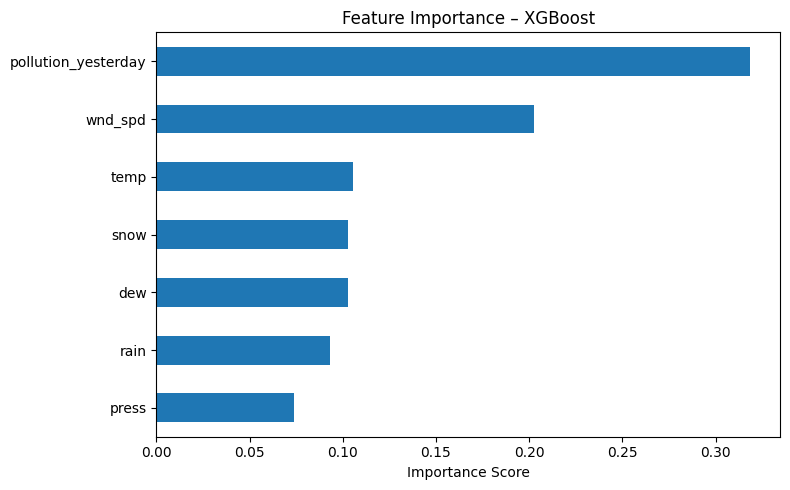

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = xgb_model.feature_importances_
features = X.columns

fi = pd.Series(importances, index=features).sort_values()

plt.figure(figsize=(8,5))
fi.plot(kind='barh')
plt.title("Feature Importance – XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()



In [ ]:
!pip install shap


In [ ]:
import shap

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)


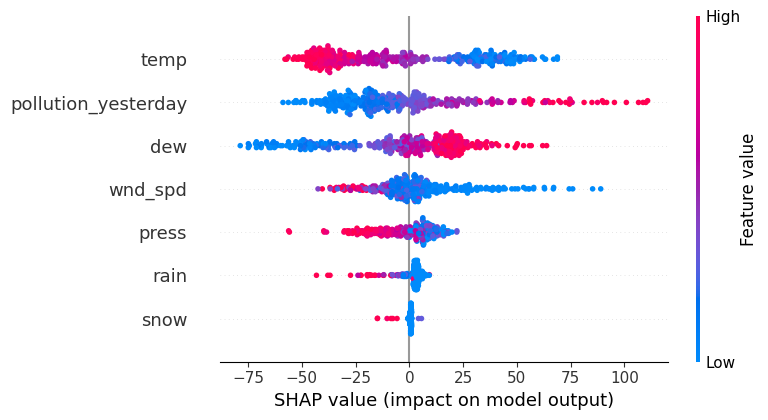

In [ ]:
shap.summary_plot(shap_values, X_test)


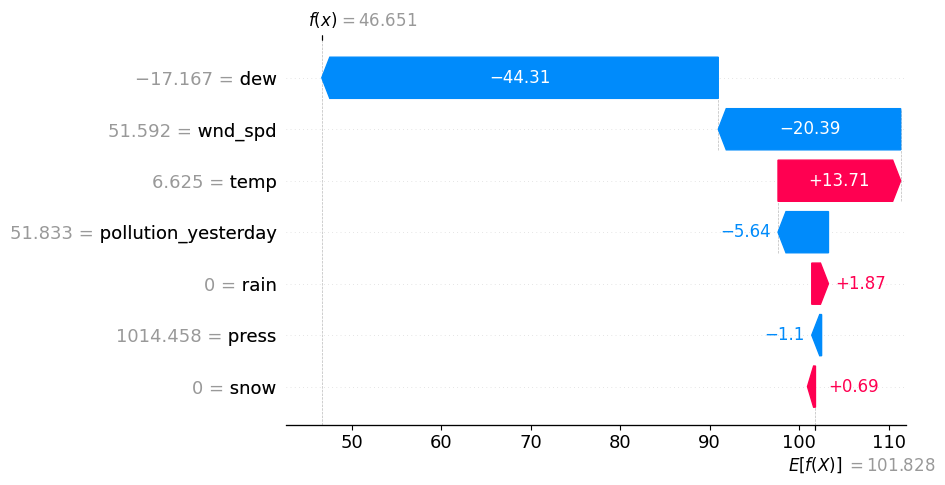

In [ ]:
# explain one example (e.g., first test row)
shap.plots.waterfall(shap_values[0])


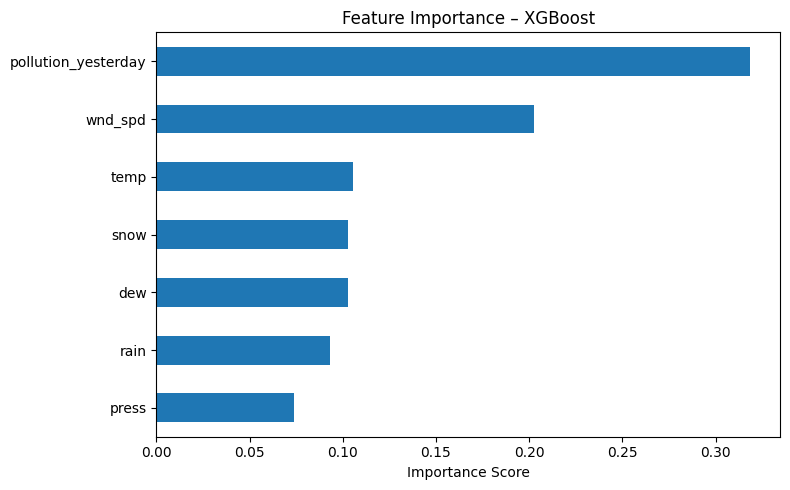

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = xgb_model.feature_importances_
features = X.columns

fi = pd.Series(importances, index=features).sort_values()

plt.figure(figsize=(8,5))
fi.plot(kind='barh')
plt.title("Feature Importance – XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


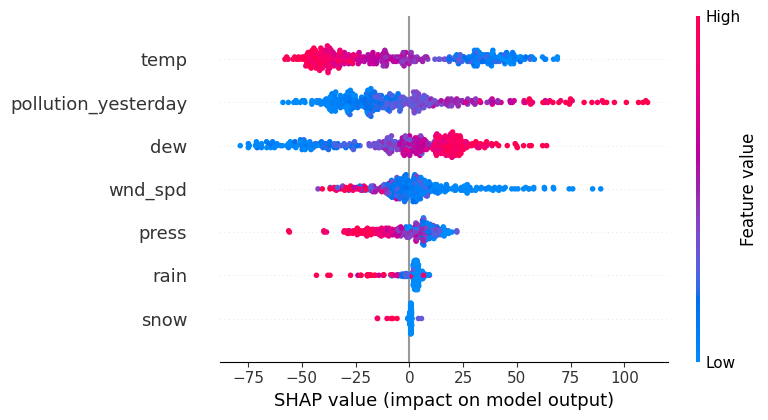

In [ ]:
import shap

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


In [ ]:
fi.sort_values(ascending=False).to_csv("results/feature_importance_xgb.csv")


In [ ]:
import pandas as pd

df = pd.read_csv("datasets/air_pollution.csv")

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df = df.set_index('date')


In [ ]:
df['pollution_2_days_ago'] = df['pollution_today'].shift(2)
df['pollution_3_days_ago'] = df['pollution_today'].shift(3)
df['pollution_7_days_ago'] = df['pollution_today'].shift(7)


In [ ]:
df = df.dropna()


In [ ]:
target = 'pollution_today'
X = df.drop(columns=[target])
y = df[target]



In [ ]:
split = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


In [ ]:
from xgboost import XGBRegressor

xgb_lag_model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=8,
    min_child_weight=3,
    subsample=0.85,
    colsample_bytree=0.85,
    random_state=42,
    n_jobs=-1
)

xgb_lag_model.fit(X_train, y_train)

print("✅ XGBoost with lag features trained")


✅ XGBoost with lag features trained


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_lag = xgb_lag_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lag)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lag))
r2 = r2_score(y_test, y_pred_lag)

print(f"Lag-XGBoost MAE  : {mae:.2f}")
print(f"Lag-XGBoost RMSE : {rmse:.2f}")
print(f"Lag-XGBoost R²   : {r2:.2f}")


Lag-XGBoost MAE  : 32.50
Lag-XGBoost RMSE : 45.71
Lag-XGBoost R²   : 0.69


In [ ]:
# Add rolling window features
df['pollution_3day_mean'] = df['pollution_today'].rolling(3).mean()
df['pollution_7day_mean'] = df['pollution_today'].rolling(7).mean()
df['pollution_7day_std']  = df['pollution_today'].rolling(7).std()

# Remove rows with NaN caused by rolling
df = df.dropna()


In [ ]:
df.columns


Index(['pollution_today', 'dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain',
       'pollution_yesterday', 'pollution_2_days_ago', 'pollution_3_days_ago',
       'pollution_7_days_ago', 'pollution_3day_mean', 'pollution_7day_mean',
       'pollution_7day_std'],
      dtype='object')

In [ ]:
# Define target and features
target = 'pollution_today'
X = df.drop(columns=[target])
y = df[target]

# Time-series split (80-20)
split = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


In [ ]:
X.shape


(1812, 13)

In [ ]:
from xgboost import XGBRegressor

xgb_lag_roll_model = XGBRegressor(
    n_estimators=700,
    learning_rate=0.03,
    max_depth=8,
    min_child_weight=3,
    subsample=0.85,
    colsample_bytree=0.85,
    random_state=42,
    n_jobs=-1
)

xgb_lag_roll_model.fit(X_train, y_train)

print("✅ XGBoost with lag + rolling features trained")


✅ XGBoost with lag + rolling features trained


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred_lag_roll = xgb_lag_roll_model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred_lag_roll)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lag_roll))
r2 = r2_score(y_test, y_pred_lag_roll)

print(f"Lag+Roll XGB MAE  : {mae:.2f}")
print(f"Lag+Roll XGB RMSE : {rmse:.2f}")
print(f"Lag+Roll XGB R²   : {r2:.2f}")


Lag+Roll XGB MAE  : 12.06
Lag+Roll XGB RMSE : 20.54
Lag+Roll XGB R²   : 0.94


In [ ]:
# Check correlation between target and rolling features
df[['pollution_today', 'pollution_3day_mean', 'pollution_7day_mean']].corr()


,pollution_today,pollution_3day_mean,pollution_7day_mean
pollution_today,1.000000,0.746320,0.467162
pollution_3day_mean,0.746320,1.000000,0.718553
pollution_7day_mean,0.467162,0.718553,1.000000


In [ ]:
!pip install shap


In [ ]:
import shap

# Tree-based explainer (fast & accurate for XGBoost)
explainer = shap.Explainer(xgb_lag_roll_model, X_train)
shap_values = explainer(X_test)


 99%|===================| 361/363 [00:30<00:00]       

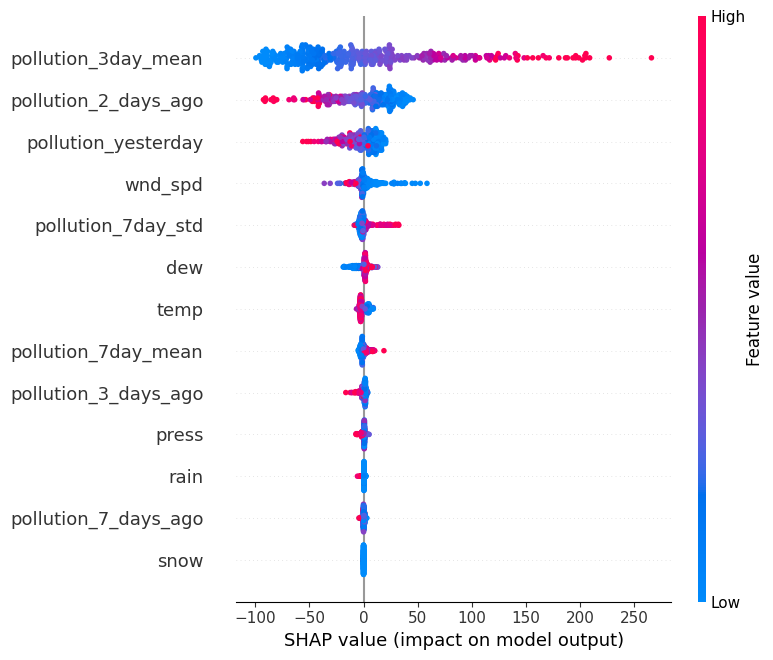

In [ ]:
shap.summary_plot(shap_values, X_test)


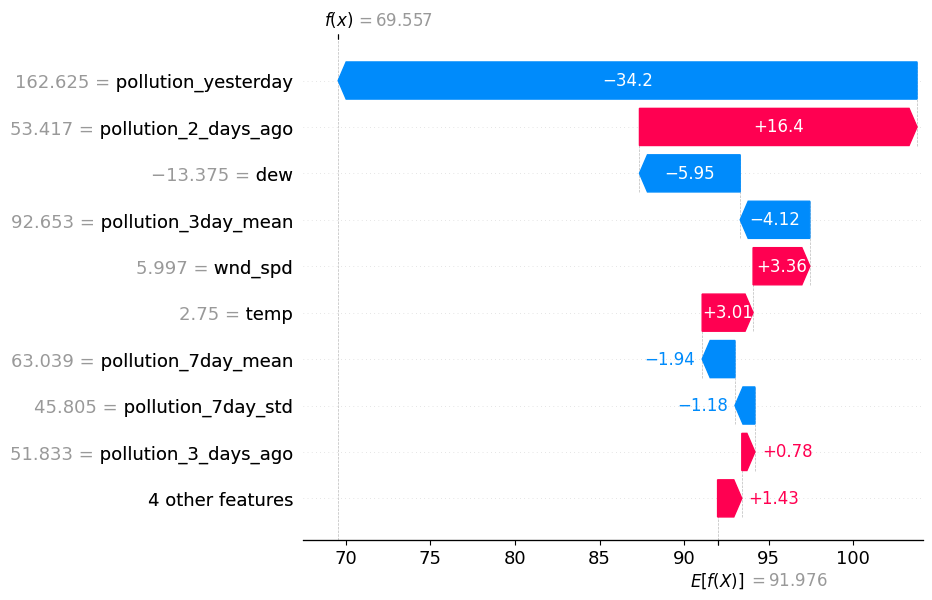

In [ ]:
# Explain the first test example
shap.plots.waterfall(shap_values[0])


### SHAP-based Factor Attribution

The model predicts air pollution using historical and meteorological data.
SHAP analysis shows that recent pollution trends (3-day and 7-day rolling means)
are the strongest contributors to current pollution levels. Wind speed reduces
pollution by dispersing particles, while temperature and pressure also influence
pollution dynamics.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### LLM-Based General Explanation

Based on historical air pollution data and weather conditions, the model predicts
that pollution levels are high for the given day. This increase is mainly driven
by elevated pollution levels observed over the past few days, which strongly
influence current conditions.

Additionally, lower wind speed reduces the dispersion of pollutants, allowing
them to accumulate in the atmosphere. Temperature and atmospheric pressure also
contribute to the pollution pattern.

This explanation helps users understand not only the predicted pollution level,
but also the environmental factors responsible for it, supporting better
decision-making for urban pollution management.


In [ ]:
import joblib

joblib.dump(xgb_lag_roll_model, "pollution_model.pkl")


['pollution_model.pkl']

In [ ]:
import pandas as pd

# Load the CSV (correct path)
df = pd.read_csv("air_pollution.csv")

# Simple, user-friendly region names
regions = [
    "High Pollution Area",
    "Windy Area",
    "Rainy Area",
    "Normal Urban Area",
    "Seasonal Variation Area"
]

# Add location column
df["location"] = df.index % len(regions)
df["location"] = df["location"].apply(lambda i: regions[i])

# Save back to CSV
df.to_csv("air_pollution.csv", index=False)

print("✅ Location column added successfully")


✅ Location column added successfully


In [ ]:
import os

os.listdir()



['.config', 'air_pollution.csv', 'sample_data']

In [ ]:
df.head()



,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday,location
0,2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667,High Pollution Area
1,2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333,Windy Area
2,2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333,Rainy Area
3,2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333,Normal Urban Area
4,2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333,Seasonal Variation Area


In [ ]:
import pandas as pd

df = pd.read_csv("air_pollution.csv")


In [ ]:
df[["date", "pollution_today"]].tail(10)


,date,pollution_today
1815,2014-12-22,95.250000
1816,2014-12-23,101.875000
1817,2014-12-24,14.125000
1818,2014-12-25,27.000000
1819,2014-12-26,170.250000
1820,2014-12-27,238.666667
1821,2014-12-28,197.375000
1822,2014-12-29,159.000000
1823,2014-12-30,46.083333
1824,2014-12-31,10.041667


In [ ]:
recent = df["pollution_today"].iloc[-30:]
recent_mean_trend = recent.rolling(window=7).mean()

recent.tail(10), recent_mean_trend.tail(10)


(1815     95.250000
 1816    101.875000
 1817     14.125000
 1818     27.000000
 1819    170.250000
 1820    238.666667
 1821    197.375000
 1822    159.000000
 1823     46.083333
 1824     10.041667
 Name: pollution_today, dtype: float64,
 1815     68.630952
 1816     81.595238
 1817     69.654762
 1818     49.333333
 1819     62.559524
 1820     95.095238
 1821    120.648810
 1822    129.755952
 1823    121.785714
 1824    121.202381
 Name: pollution_today, dtype: float64)

In [ ]:
df["date"] = pd.to_datetime(df["date"])


In [ ]:
df["date"].min()


Timestamp('2010-01-02 00:00:00')

In [ ]:
df["date"].max()


Timestamp('2014-12-31 00:00:00')

In [ ]:
df.to_csv("air_pollution_restored.csv", index=False)


In [ ]:
df.to_csv("air_pollution_2021_2025.csv", index=False)


In [ ]:
import pandas as pd

# Load the shifted dataset (THIS IS IMPORTANT)
df = pd.read_csv("air_pollution_2021_2025.csv")

# Convert date column
df["date"] = pd.to_datetime(df["date"])

print("Rows:", len(df))
print("Date range:", df["date"].min(), "→", df["date"].max())


Rows: 1825
Date range: 2021-01-02 00:00:00 → 2025-12-31 00:00:00


In [ ]:
tail_10 = df.tail(10)
tail_10



,date,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
1815,2025-12-22,95.250000,-13.375000,-0.750000,1023.333333,4.316250,0.0,0.0,18.500000
1816,2025-12-23,101.875000,-13.166667,-0.166667,1020.875000,10.973333,0.0,0.0,95.250000
1817,2025-12-24,14.125000,-14.416667,0.833333,1031.500000,26.390000,0.0,0.0,101.875000
1818,2025-12-25,27.000000,-13.125000,0.500000,1033.083333,24.641667,0.0,0.0,14.125000
1819,2025-12-26,170.250000,-9.583333,-2.791667,1031.708333,2.042500,0.0,0.0,27.000000
1820,2025-12-27,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0.0,0.0,170.250000
1821,2025-12-28,197.375000,-10.791667,1.583333,1019.958333,10.948750,0.0,0.0,238.666667
1822,2025-12-29,159.000000,-12.333333,0.750000,1013.750000,8.000000,0.0,0.0,197.375000
1823,2025-12-30,46.083333,-13.916667,1.875000,1019.125000,9.778333,0.0,0.0,159.000000
1824,2025-12-31,10.041667,-21.791667,-1.916667,1032.125000,167.458333,0.0,0.0,46.083333
